In [ ]:
import pandas as pd

# Path to the uploaded Excel file
file_path = '/content/IDN.xlsx'

# Load the Excel file
forest_loss_data = pd.read_excel(file_path)

# Display the first few rows of the data
forest_loss_data.head()

,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,About,NaN


In [ ]:
import pandas as pd

# Path to the uploaded file
file_path = '/content/IDN.xlsx'

# List all sheet names
sheet_names = pd.ExcelFile(file_path).sheet_names
print("Available Sheets:", sheet_names)

Available Sheets: ['Read_Me', 'Country tree cover loss', 'Country carbon data', 'Subnational 1 tree cover loss', 'Subnational 1 carbon data', 'Subnational 2 tree cover loss', 'Subnational 2 carbon data']


In [ ]:
import pandas as pd

# Path to the Excel file
file_path = '/content/IDN.xlsx'

# Load the 'Subnational 2 tree cover loss' sheet
forest_loss_data = pd.read_excel(file_path, sheet_name='Subnational 2 tree cover loss')

# Display the first few rows to understand the structure
forest_loss_data.head()

# Display the column names to understand the structure
print(forest_loss_data.columns)

Index(['country', 'subnational1', 'subnational2', 'threshold', 'area_ha',
       'extent_2000_ha', 'extent_2010_ha', 'gain_2000-2020_ha',
       'tc_loss_ha_2001', 'tc_loss_ha_2002', 'tc_loss_ha_2003',
       'tc_loss_ha_2004', 'tc_loss_ha_2005', 'tc_loss_ha_2006',
       'tc_loss_ha_2007', 'tc_loss_ha_2008', 'tc_loss_ha_2009',
       'tc_loss_ha_2010', 'tc_loss_ha_2011', 'tc_loss_ha_2012',
       'tc_loss_ha_2013', 'tc_loss_ha_2014', 'tc_loss_ha_2015',
       'tc_loss_ha_2016', 'tc_loss_ha_2017', 'tc_loss_ha_2018',
       'tc_loss_ha_2019', 'tc_loss_ha_2020', 'tc_loss_ha_2021',
       'tc_loss_ha_2022', 'tc_loss_ha_2023'],
      dtype='object')


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load the 'Subnational 2 tree cover loss' data
file_path = '/content/IDN.xlsx'
forest_loss_data = pd.read_excel(file_path, sheet_name='Subnational 2 tree cover loss')

# Display the first few rows of the data
forest_loss_data.head()

# Step 2: Filter the key columns (Subnational2, extent in 2000, and loss in 2020)
# Assuming 'subnational2' is the identifier for the region, and 'tc_loss_ha_2020' shows the loss
forest_loss_2000 = forest_loss_data[['subnational2', 'extent_2000_ha']]
forest_loss_2020 = forest_loss_data[['subnational2', 'tc_loss_ha_2020']]

# Rename columns for clarity
forest_loss_2000.rename(columns={'extent_2000_ha': 'Forest_Extent_2000'}, inplace=True)
forest_loss_2020.rename(columns={'tc_loss_ha_2020': 'Forest_Loss_2020'}, inplace=True)

# Merge the 2000 and 2020 data on subnational2
merged_loss_data = forest_loss_2000.merge(forest_loss_2020, on='subnational2')

# Display the merged data
merged_loss_data.head()

<ipython-input-5-9dd50bdef44e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forest_loss_2000.rename(columns={'extent_2000_ha': 'Forest_Extent_2000'}, inplace=True)
<ipython-input-5-9dd50bdef44e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forest_loss_2020.rename(columns={'tc_loss_ha_2020': 'Forest_Loss_2020'}, inplace=True)


,subnational2,Forest_Extent_2000,Forest_Loss_2020
0,Aceh Barat,281203,1522
1,Aceh Barat,281203,1426
2,Aceh Barat,281203,1415
3,Aceh Barat,281203,1407
4,Aceh Barat,281203,1401


In [ ]:
# Load the GADM boundary shapefile for Indonesia (Subnational 2)
shapefile_path = '/content/gadm41_IDN_2.shp'
indonesia_boundary = gpd.read_file(shapefile_path)

# Filter for Kalimantan only
kalimantan_regions = indonesia_boundary[indonesia_boundary['NAME_1'].str.contains('Kalimantan', case=False, na=False)]

# Check the columns of the boundary shapefile to identify subnational2 reference
print(kalimantan_regions.columns)

# Check if we can match the subnational2 to the NAME_2 column in the GADM shapefile
kalimantan_regions.head()

Index(['GID_2', 'GID_0', 'COUNTRY', 'GID_1', 'NAME_1', 'NL_NAME_1', 'NAME_2',
       'VARNAME_2', 'NL_NAME_2', 'TYPE_2', 'ENGTYPE_2', 'CC_2', 'HASC_2',
       'geometry'],
      dtype='object')


,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
182,IDN.12.1_1,IDN,Indonesia,IDN.12_1,Kalimantan Barat,NA,Bengkayang,NA,NA,Kabupaten,Regency,6102,ID.KB.BE,"MULTIPOLYGON (((109.03071 0.57187, 109.03069 0..."
183,IDN.12.2_1,IDN,Indonesia,IDN.12_1,Kalimantan Barat,NA,Kapuas Hulu,NA,NA,Kabupaten,Regency,6108,ID.KB.KH,"POLYGON ((112.14668 0.07988, 112.14375 0.08084..."
184,IDN.12.3_1,IDN,Indonesia,IDN.12_1,Kalimantan Barat,NA,Kayong Utara,NA,NA,Kabupaten,Regency,6111,ID.KB.KU,"MULTIPOLYGON (((108.77138 -1.7008, 108.77176 -..."
185,IDN.12.4_1,IDN,Indonesia,IDN.12_1,Kalimantan Barat,NA,Ketapang,NA,NA,Kabupaten,Regency,6106,ID.KB.KP,"MULTIPOLYGON (((110.09202 -2.8938, 110.09208 -..."
186,IDN.12.5_1,IDN,Indonesia,IDN.12_1,Kalimantan Barat,NA,Kota Pontianak,NA,NA,Kota,City,6171,ID.KB.PN,"MULTIPOLYGON (((109.36031 -0.0715, 109.36002 -..."


In [ ]:
# Merge the loss data with the GADM boundary
merged_gdf = kalimantan_regions.merge(merged_loss_data, left_on='NAME_2', right_on='subnational2', how='left')

# Display the first few rows to ensure it merged correctly
merged_gdf.head()

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,subnational2,Forest_Extent_2000,Forest_Loss_2020
0,IDN.12.1_1,IDN,Indonesia,IDN.12_1,Kalimantan Barat,NA,Bengkayang,NA,NA,Kabupaten,Regency,6102,ID.KB.BE,"MULTIPOLYGON (((109.03071 0.57187, 109.03069 0...",Bengkayang,560507,8299
1,IDN.12.1_1,IDN,Indonesia,IDN.12_1,Kalimantan Barat,NA,Bengkayang,NA,NA,Kabupaten,Regency,6102,ID.KB.BE,"MULTIPOLYGON (((109.03071 0.57187, 109.03069 0...",Bengkayang,560507,8103
2,IDN.12.1_1,IDN,Indonesia,IDN.12_1,Kalimantan Barat,NA,Bengkayang,NA,NA,Kabupaten,Regency,6102,ID.KB.BE,"MULTIPOLYGON (((109.03071 0.57187, 109.03069 0...",Bengkayang,560507,8083
3,IDN.12.1_1,IDN,Indonesia,IDN.12_1,Kalimantan Barat,NA,Bengkayang,NA,NA,Kabupaten,Regency,6102,ID.KB.BE,"MULTIPOLYGON (((109.03071 0.57187, 109.03069 0...",Bengkayang,560507,8062
4,IDN.12.1_1,IDN,Indonesia,IDN.12_1,Kalimantan Barat,NA,Bengkayang,NA,NA,Kabupaten,Regency,6102,ID.KB.BE,"MULTIPOLYGON (((109.03071 0.57187, 109.03069 0...",Bengkayang,560507,8053


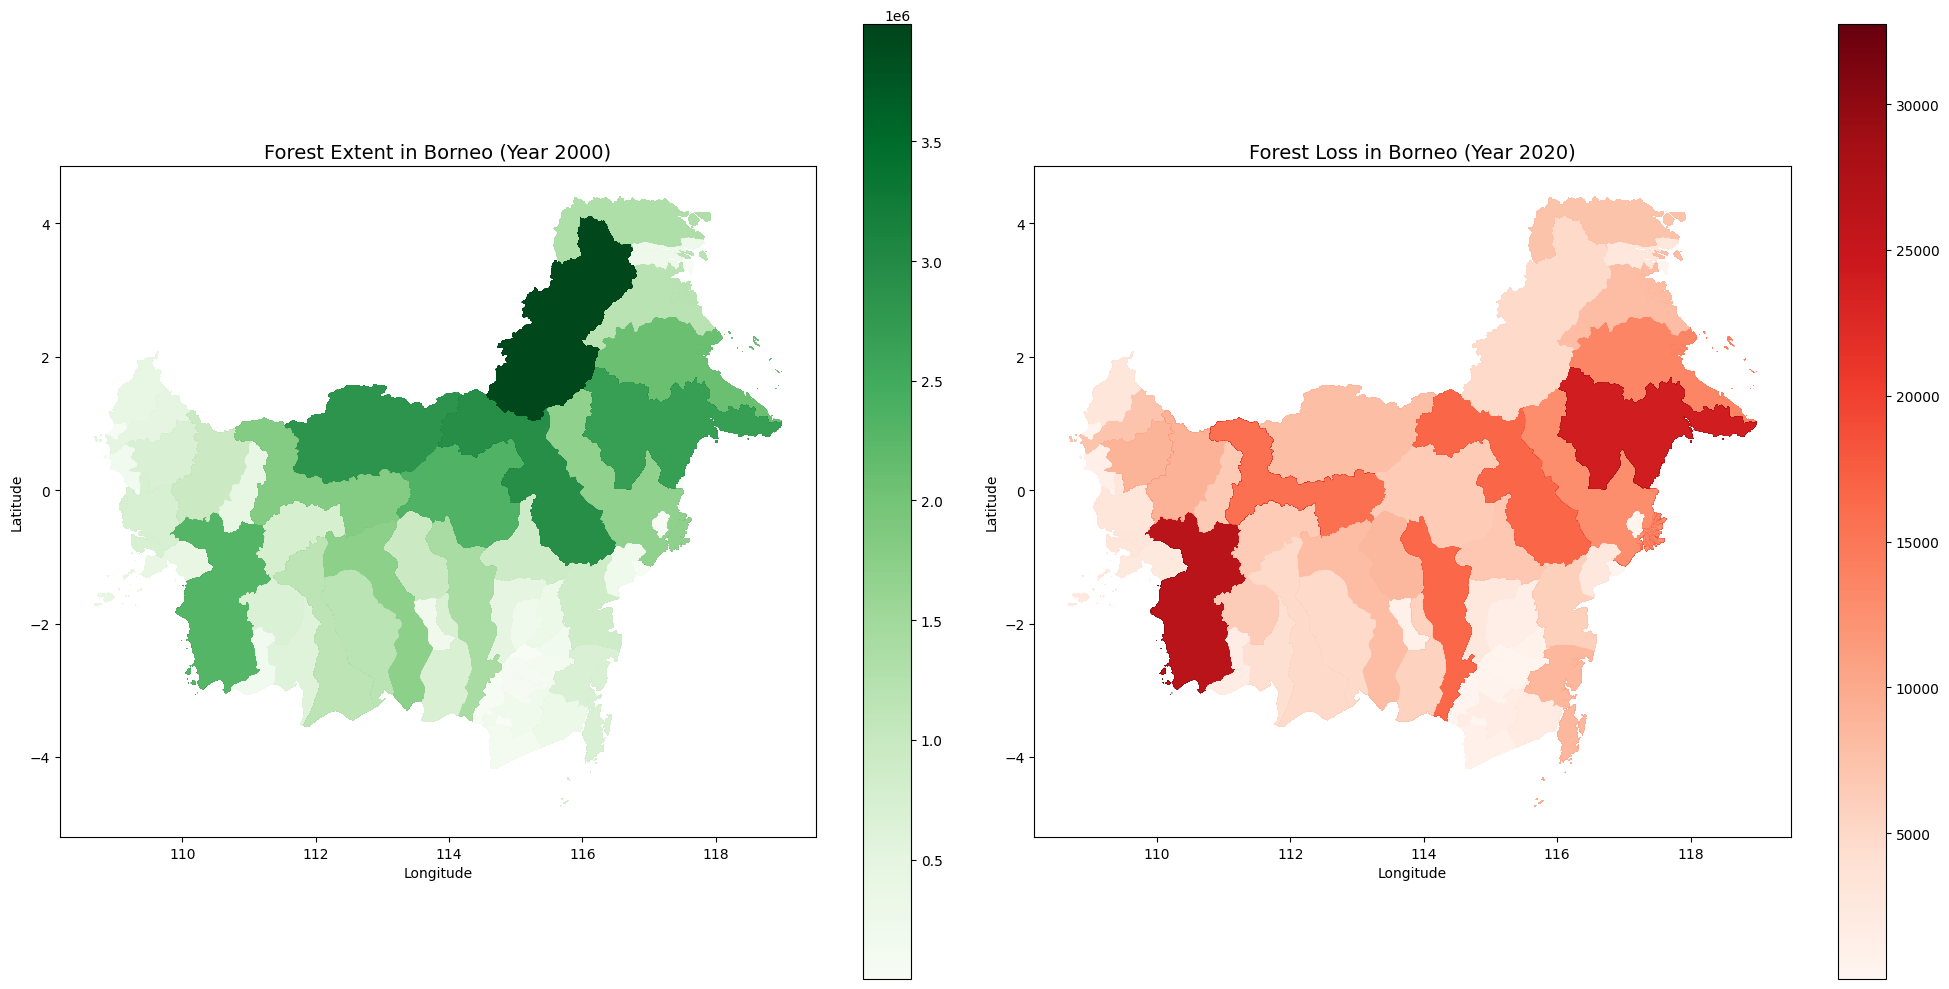

In [ ]:
# Plot the comparison for 2000 vs 2020
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot 2000 Forest Extent
ax1 = axes[0]
merged_gdf.plot(ax=ax1, column='Forest_Extent_2000', cmap='Greens', legend=True)
ax1.set_title('Forest Extent in Borneo (Year 2000)', fontsize=14)
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# Plot 2020 Forest Loss
ax2 = axes[1]
merged_gdf.plot(ax=ax2, column='Forest_Loss_2020', cmap='Reds', legend=True)
ax2.set_title('Forest Loss in Borneo (Year 2020)', fontsize=14)
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

# Final layout
plt.tight_layout()
plt.show()

In [ ]:
merged_gdf['Net_Loss'] = merged_gdf['Forest_Extent_2000'] - merged_gdf['Forest_Loss_2020']

<ipython-input-11-7b3d42d6c1df>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forest_loss_2000.rename(columns={'extent_2000_ha': 'Forest_Extent_2000'}, inplace=True)
<ipython-input-11-7b3d42d6c1df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forest_loss_2020.rename(columns={'tc_loss_ha_2020': 'Forest_Loss_2020'}, inplace=True)


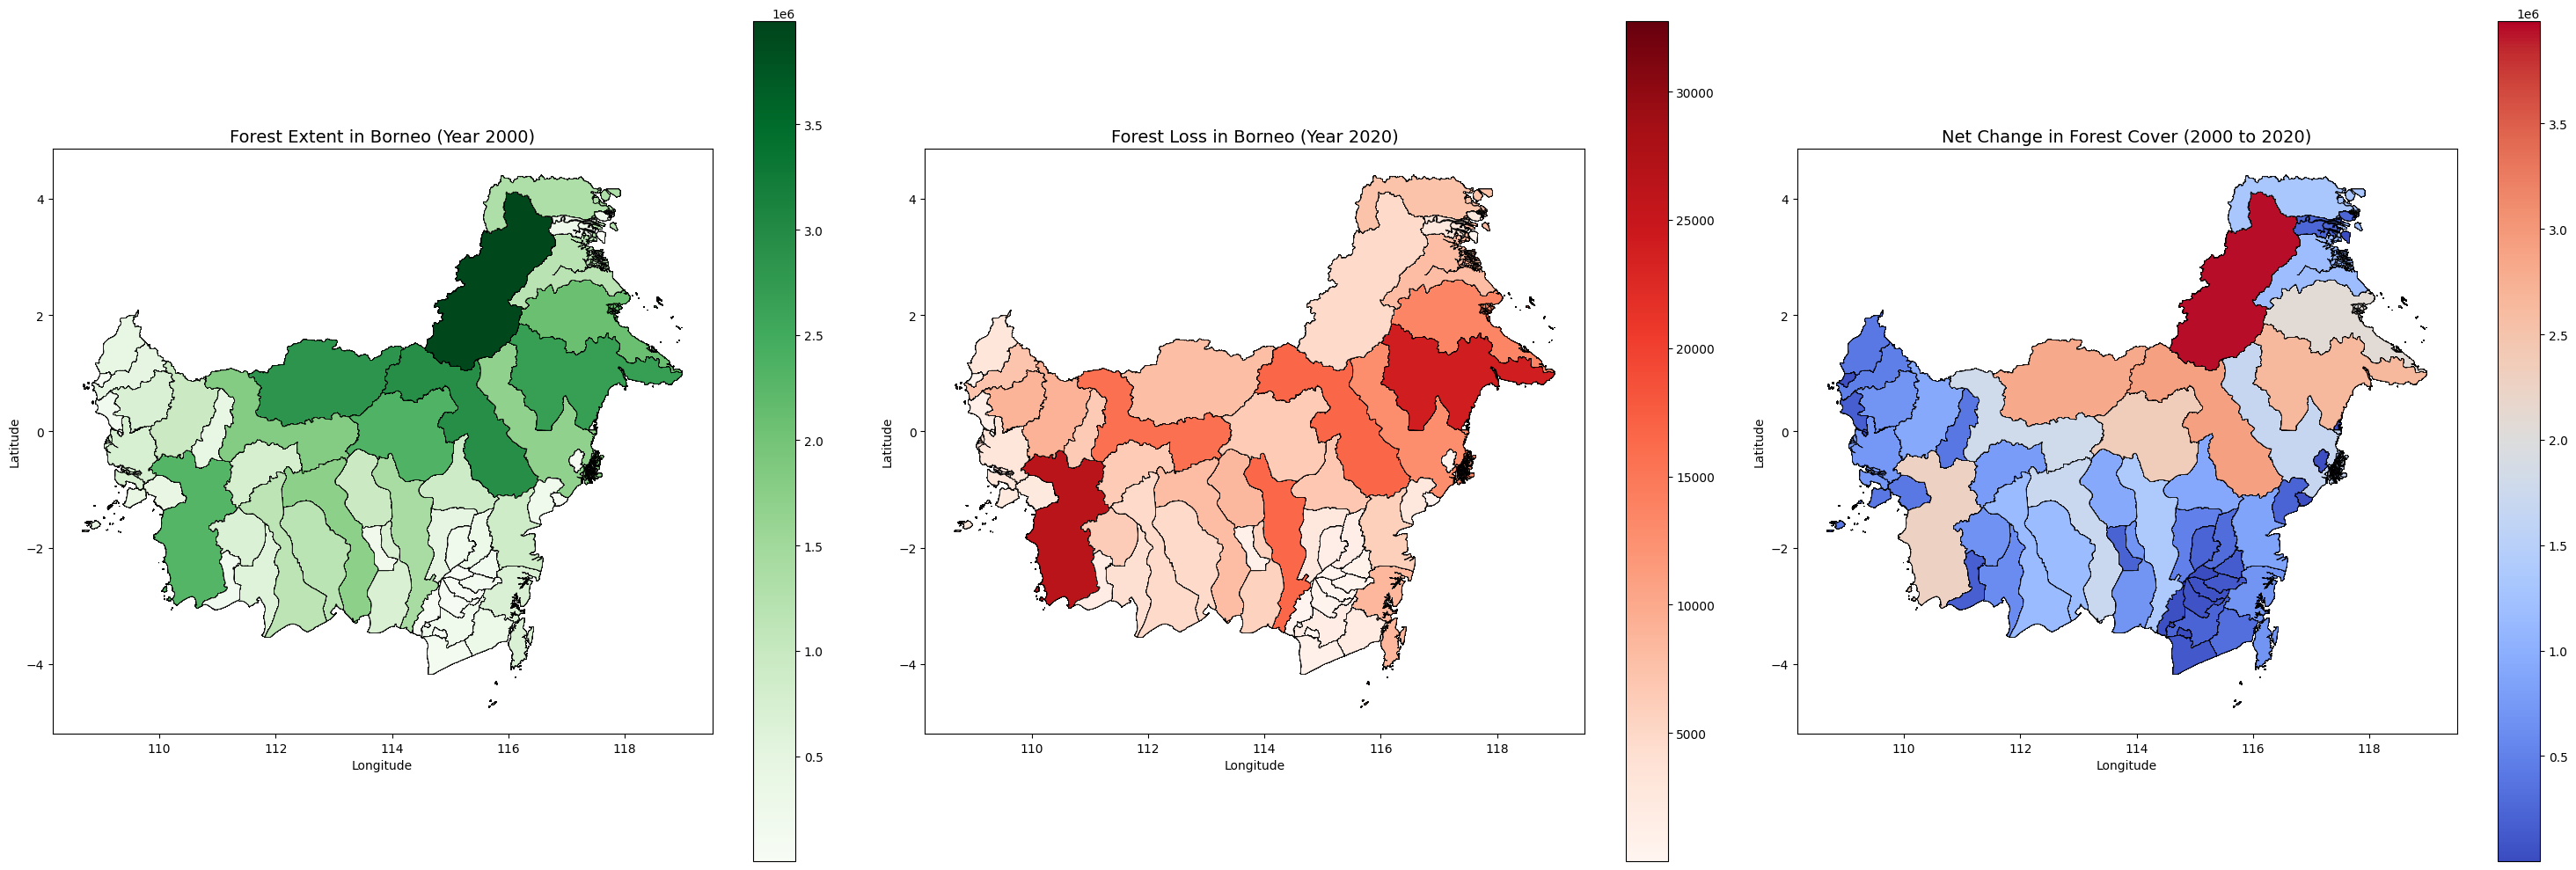

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load the forest loss data
file_path = '/content/IDN.xlsx'
forest_loss_data = pd.read_excel(file_path, sheet_name='Subnational 2 tree cover loss')

# Step 2: Extract columns for forest extent (2000) and forest loss (2020)
forest_loss_2000 = forest_loss_data[['subnational2', 'extent_2000_ha']]
forest_loss_2020 = forest_loss_data[['subnational2', 'tc_loss_ha_2020']]

# Rename columns for clarity
forest_loss_2000.rename(columns={'extent_2000_ha': 'Forest_Extent_2000'}, inplace=True)
forest_loss_2020.rename(columns={'tc_loss_ha_2020': 'Forest_Loss_2020'}, inplace=True)

# Merge the 2000 and 2020 data on subnational2
merged_loss_data = forest_loss_2000.merge(forest_loss_2020, on='subnational2')

# Step 3: Load the GADM boundary shapefile for Subnational 2
shapefile_path = '/content/gadm41_IDN_2.shp'
indonesia_boundary = gpd.read_file(shapefile_path)

# Filter for Kalimantan regions only
kalimantan_regions = indonesia_boundary[indonesia_boundary['NAME_1'].str.contains('Kalimantan', case=False, na=False)]

# Step 4: Merge the forest loss data with Kalimantan boundary
merged_gdf = kalimantan_regions.merge(merged_loss_data, left_on='NAME_2', right_on='subnational2', how='left')

# Step 5: Calculate the difference between 2000 forest extent and 2020 forest loss
merged_gdf['Net_Loss'] = merged_gdf['Forest_Extent_2000'] - merged_gdf['Forest_Loss_2020']

# Step 6: Plot the 2000, 2020, and Net Change maps
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

# Map 1: Forest Extent in 2000
ax1 = axes[0]
merged_gdf.plot(ax=ax1, column='Forest_Extent_2000', cmap='Greens', legend=True, edgecolor='black', linewidth=0.5)
ax1.set_title('Forest Extent in Borneo (Year 2000)', fontsize=14)
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# Map 2: Forest Loss in 2020
ax2 = axes[1]
merged_gdf.plot(ax=ax2, column='Forest_Loss_2020', cmap='Reds', legend=True, edgecolor='black', linewidth=0.5)
ax2.set_title('Forest Loss in Borneo (Year 2020)', fontsize=14)
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

# Map 3: Difference (Net Change) from 2000 to 2020
ax3 = axes[2]
merged_gdf.plot(ax=ax3, column='Net_Loss', cmap='coolwarm', legend=True, edgecolor='black', linewidth=0.5)
ax3.set_title('Net Change in Forest Cover (2000 to 2020)', fontsize=14)
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')

# Finalize layout
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Manually create poaching data based on PHVA and Orangutan Crisis documents
poaching_data = pd.DataFrame({
    'Subnational2': ['Kalimantan Barat', 'Kalimantan Timur', 'Kalimantan Tengah', 'Kalimantan Selatan'],
    'Year': [2020, 2020, 2020, 2020],
    'Poaching_Incidents': [15, 20, 25, 10]  # Example counts from reports
})

# Display the poaching data
poaching_data

,Subnational2,Year,Poaching_Incidents
0,Kalimantan Barat,2020,15
1,Kalimantan Timur,2020,20
2,Kalimantan Tengah,2020,25
3,Kalimantan Selatan,2020,10


In [ ]:
import geopandas as gpd

# Load the GADM boundary shapefile for Subnational 2
shapefile_path = '/content/gadm41_IDN_2.shp'
indonesia_boundary = gpd.read_file(shapefile_path)

# Filter for Kalimantan only
kalimantan_regions = indonesia_boundary[indonesia_boundary['NAME_1'].str.contains('Kalimantan', case=False, na=False)]

# Check if subnational2 names match between the poaching data and the GADM file
print('Poaching Regions:', poaching_data['Subnational2'].unique())
print('GADM Subnational2 Regions:', kalimantan_regions['NAME_2'].unique())

Poaching Regions: ['Kalimantan Barat' 'Kalimantan Timur' 'Kalimantan Tengah'
 'Kalimantan Selatan']
GADM Subnational2 Regions: ['Bengkayang' 'Kapuas Hulu' 'Kayong Utara' 'Ketapang' 'Kota Pontianak'
 'Kubu Raya' 'Landak' 'Melawi' 'Pontianak' 'Sambas' 'Sanggau' 'Sekadau'
 'Singkawang' 'Sintang' 'Balangan' 'Banjar' 'Banjar Baru' 'Banjarmasin'
 'Barito Kuala' 'Hulu Sungai Selatan' 'Hulu Sungai Tengah'
 'Hulu Sungai Utara' 'Kota Baru' 'Tabalong' 'Tanah Bumbu' 'Tanah Laut'
 'Tapin' 'Barito Selatan' 'Barito Timur' 'Barito Utara' 'Gunung Mas'
 'Kapuas' 'Katingan' 'Kotawaringin Barat' 'Kotawaringin Timur' 'Lamandau'
 'Murung Raya' 'Palangka Raya' 'Pulang Pisau' 'Seruyan' 'Sukamara'
 'Balikpapan' 'Berau' 'Bontang' 'Kutai Barat' 'Kutai Kartanegara'
 'Kutai Timur' 'Paser' 'Penajam Paser Utara' 'Samarinda' 'Bulungan'
 'Malinau' 'Nunukan' 'Tana Tidung' 'Tarakan']


In [ ]:
print("Column Names:", merged_gdf.columns)

Column Names: Index(['GID_2', 'GID_0', 'COUNTRY', 'GID_1', 'NAME_1', 'NL_NAME_1', 'NAME_2',
       'VARNAME_2', 'NL_NAME_2', 'TYPE_2', 'ENGTYPE_2', 'CC_2', 'HASC_2',
       'geometry', 'Province', 'Year', 'Poaching_Incidents',
       'Subregion_Incident_Share'],
      dtype='object')


In [ ]:
print("Columns in forest_loss_data:", forest_loss_data.columns)

Columns in forest_loss_data: Index(['country', 'subnational1', 'subnational2', 'threshold', 'area_ha',
       'extent_2000_ha', 'extent_2010_ha', 'gain_2000-2020_ha',
       'tc_loss_ha_2001', 'tc_loss_ha_2002', 'tc_loss_ha_2003',
       'tc_loss_ha_2004', 'tc_loss_ha_2005', 'tc_loss_ha_2006',
       'tc_loss_ha_2007', 'tc_loss_ha_2008', 'tc_loss_ha_2009',
       'tc_loss_ha_2010', 'tc_loss_ha_2011', 'tc_loss_ha_2012',
       'tc_loss_ha_2013', 'tc_loss_ha_2014', 'tc_loss_ha_2015',
       'tc_loss_ha_2016', 'tc_loss_ha_2017', 'tc_loss_ha_2018',
       'tc_loss_ha_2019', 'tc_loss_ha_2020', 'tc_loss_ha_2021',
       'tc_loss_ha_2022', 'tc_loss_ha_2023'],
      dtype='object')


In [ ]:
forest_loss_data.rename(columns={
    'extent_2000_ha': 'Forest_Extent_2000',
    'tc_loss_ha_2020': 'Forest_Loss_2020'
}, inplace=True)

In [ ]:
forest_loss_data = forest_loss_data[['subnational2', 'Forest_Extent_2000', 'Forest_Loss_2020']]

In [ ]:
forest_loss_data['subnational2'] = forest_loss_data['subnational2'].str.strip().str.lower()
merged_gdf['NAME_2'] = merged_gdf['NAME_2'].str.strip().str.lower()

In [ ]:
merged_gdf = merged_gdf.merge(forest_loss_data, left_on='NAME_2', right_on='subnational2', how='left')

In [ ]:
# Filter for regions within Borneo (4 Kalimantan provinces)
borneo_regions = ['kalimantan barat', 'kalimantan timur', 'kalimantan tengah', 'kalimantan selatan']

# Filter for Borneo regions using NAME_1
merged_gdf = merged_gdf[merged_gdf['NAME_1'].str.strip().str.lower().isin(borneo_regions)]

In [ ]:
# Print unique names in NAME_1 to ensure only Kalimantan regions remain
print("Regions in NAME_1 after filtering for Borneo:", merged_gdf['NAME_1'].unique())

Regions in NAME_1 after filtering for Borneo: ['Kalimantan Barat' 'Kalimantan Selatan' 'Kalimantan Tengah'
 'Kalimantan Timur']


In [ ]:
if 'Forest_Extent_2000' in merged_gdf.columns and 'Forest_Loss_2020' in merged_gdf.columns:
    merged_gdf['Net_Loss'] = merged_gdf['Forest_Extent_2000'] - merged_gdf['Forest_Loss_2020']
    print("Net_Loss successfully calculated for Borneo.")
else:
    print("ERROR: Columns 'Forest_Extent_2000' or 'Forest_Loss_2020' are missing.")

Net_Loss successfully calculated for Borneo.


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


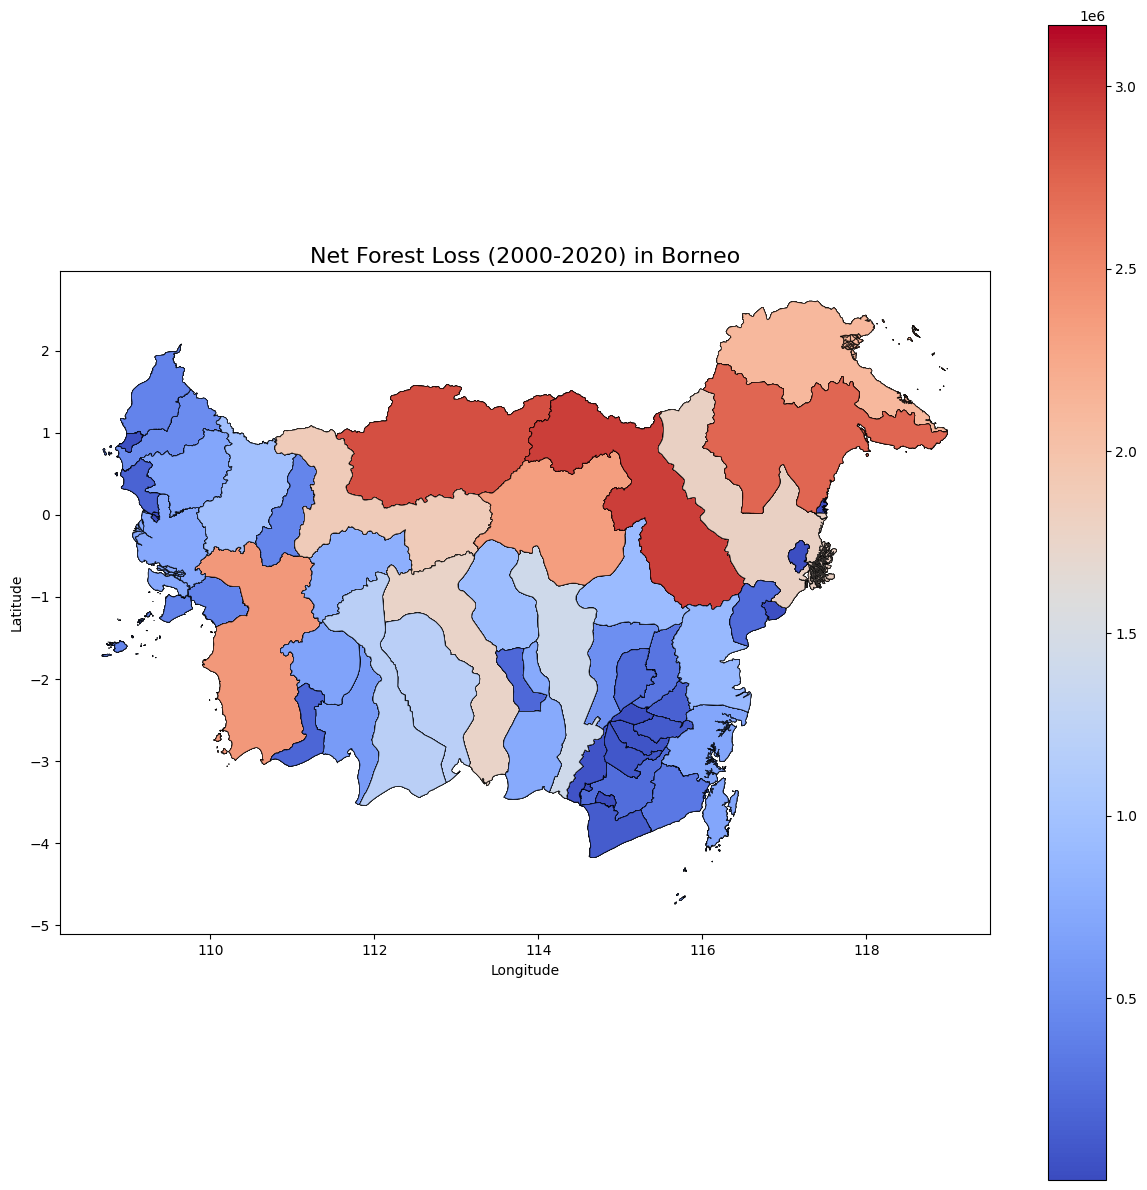

In [ ]:
import matplotlib.pyplot as plt

if 'Net_Loss' in merged_gdf.columns:
    fig, ax = plt.subplots(figsize=(15, 15))

    # Plot Net_Loss on the map (Borneo only)
    merged_gdf.plot(ax=ax, column='Net_Loss', cmap='coolwarm', legend=True, edgecolor='black', linewidth=0.5, alpha=0.7)

    # Title and labels
    plt.title('Net Forest Loss (2000-2020) in Borneo', fontsize=16)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
else:
    print("ERROR: 'Net_Loss' column is missing.")

Columns in merged_gdf: Index(['GID_2', 'GID_0', 'COUNTRY', 'GID_1', 'NAME_1', 'NL_NAME_1', 'NAME_2',
       'VARNAME_2', 'NL_NAME_2', 'TYPE_2', 'ENGTYPE_2', 'CC_2', 'HASC_2',
       'geometry', 'subnational2', 'Forest_Extent_2000', 'Forest_Loss_2020'],
      dtype='object')
       NAME_2  Forest_Extent_2000  Forest_Loss_2020
0  bengkayang              560507              8299
1  bengkayang              536775              8103
2  bengkayang              534659              8083
3  bengkayang              533322              8062
4  bengkayang              532437              8053
NaN values in Forest_Extent_2000: 0
NaN values in Forest_Loss_2020: 0
Net_Loss successfully calculated for Borneo.
NaN values in Net_Loss: 0


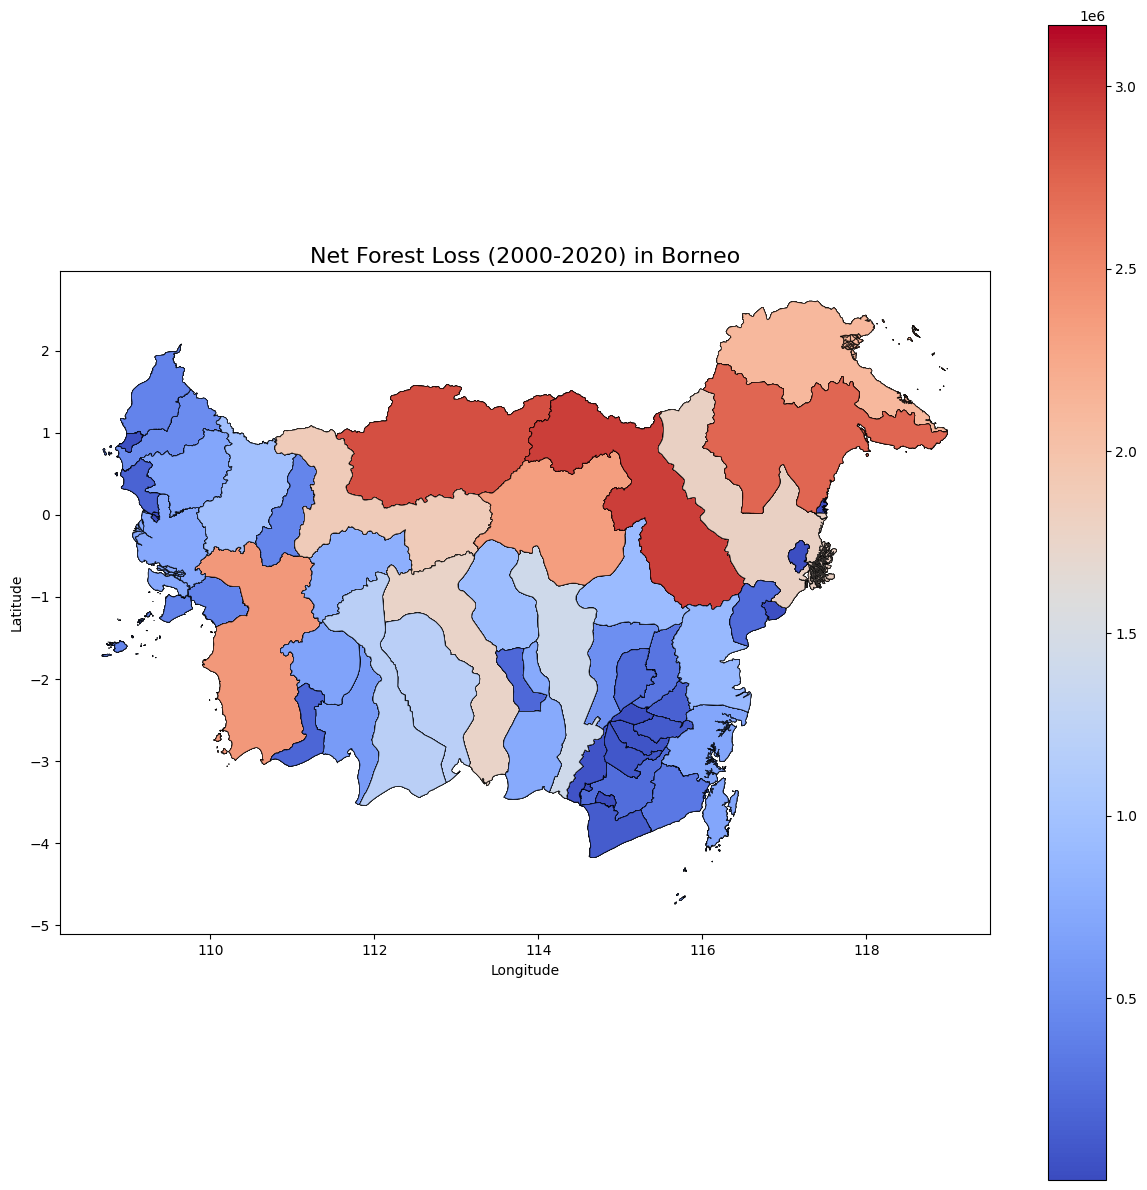

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load Forest Loss Data
file_path = '/content/IDN.xlsx'
forest_loss_data = pd.read_excel(file_path, sheet_name='Subnational 2 tree cover loss')

# Step 2: Rename the columns to be more readable
forest_loss_data.rename(columns={
    'extent_2000_ha': 'Forest_Extent_2000',
    'tc_loss_ha_2020': 'Forest_Loss_2020'
}, inplace=True)

# Step 3: Keep only relevant columns
forest_loss_data = forest_loss_data[['subnational2', 'Forest_Extent_2000', 'Forest_Loss_2020']]

# Step 4: Normalize subnational2 names for matching
forest_loss_data['subnational2'] = forest_loss_data['subnational2'].str.strip().str.lower()

# Step 5: Load GADM shapefile for Subnational2
shapefile_path = '/content/gadm41_IDN_2.shp'
merged_gdf = gpd.read_file(shapefile_path)

# Step 6: Normalize NAME_2 for matching
merged_gdf['NAME_2'] = merged_gdf['NAME_2'].str.strip().str.lower()
merged_gdf['NAME_1'] = merged_gdf['NAME_1'].str.strip().str.lower()

# Step 7: Filter for Borneo regions only (Kalimantan provinces)
borneo_regions = ['kalimantan barat', 'kalimantan timur', 'kalimantan tengah', 'kalimantan selatan']
merged_gdf = merged_gdf[merged_gdf['NAME_1'].isin(borneo_regions)]

# Step 8: Merge forest loss data with GADM shapefile
merged_gdf = merged_gdf.merge(forest_loss_data, left_on='NAME_2', right_on='subnational2', how='left')

# Step 9: Check if the merge was successful
print("Columns in merged_gdf:", merged_gdf.columns)
print(merged_gdf[['NAME_2', 'Forest_Extent_2000', 'Forest_Loss_2020']].head())

# Step 10: Check for NaN values in the relevant columns
print("NaN values in Forest_Extent_2000:", merged_gdf['Forest_Extent_2000'].isna().sum())
print("NaN values in Forest_Loss_2020:", merged_gdf['Forest_Loss_2020'].isna().sum())

# Step 11: Calculate Net_Loss
if 'Forest_Extent_2000' in merged_gdf.columns and 'Forest_Loss_2020' in merged_gdf.columns:
    merged_gdf['Net_Loss'] = merged_gdf['Forest_Extent_2000'] - merged_gdf['Forest_Loss_2020']
    print("Net_Loss successfully calculated for Borneo.")
else:
    print("ERROR: Columns 'Forest_Extent_2000' or 'Forest_Loss_2020' are missing.")

# Step 12: Check for NaN in Net_Loss
print("NaN values in Net_Loss:", merged_gdf['Net_Loss'].isna().sum())

# Step 13: Plot the Net_Loss (for Borneo only)
if 'Net_Loss' in merged_gdf.columns:
    fig, ax = plt.subplots(figsize=(15, 15))

    # Plot the Net_Loss on the map
    merged_gdf.plot(ax=ax, column='Net_Loss', cmap='coolwarm', legend=True, edgecolor='black', linewidth=0.5, alpha=0.7)

    # Title and labels
    plt.title('Net Forest Loss (2000-2020) in Borneo', fontsize=16)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
else:
    print("ERROR: 'Net_Loss' column is missing.")

In [ ]:
print(merged_gdf.columns)

Index(['GID_2', 'GID_0', 'COUNTRY', 'GID_1', 'NAME_1', 'NL_NAME_1', 'NAME_2',
       'VARNAME_2', 'NL_NAME_2', 'TYPE_2', 'ENGTYPE_2', 'CC_2', 'HASC_2',
       'geometry', 'Province', 'Poaching_Incidents',
       'Subregion_Incident_Share'],
      dtype='object')


In [ ]:
print(merged_gdf['NAME_1'].unique())

['kalimantan barat' 'kalimantan selatan' 'kalimantan tengah'
 'kalimantan timur']


In [ ]:
merged_gdf['NAME_1'] = merged_gdf['NAME_1'].str.strip().str.lower()

In [ ]:
borneo_regions = ['kalimantan barat', 'kalimantan timur', 'kalimantan tengah', 'kalimantan selatan']
merged_gdf = merged_gdf[merged_gdf['NAME_1'].isin(borneo_regions)]

In [ ]:
print(merged_gdf['NAME_1'].unique())

['kalimantan barat' 'kalimantan selatan' 'kalimantan tengah'
 'kalimantan timur']


In [ ]:
print(merged_gdf.columns)
print(merged_gdf[['NAME_1', 'NAME_2']].head())

Index(['GID_2', 'GID_0', 'COUNTRY', 'GID_1', 'NAME_1', 'NL_NAME_1', 'NAME_2',
       'VARNAME_2', 'NL_NAME_2', 'TYPE_2', 'ENGTYPE_2', 'CC_2', 'HASC_2',
       'geometry', 'Province', 'Poaching_Incidents',
       'Subregion_Incident_Share'],
      dtype='object')
             NAME_1          NAME_2
0  kalimantan barat      bengkayang
1  kalimantan barat     kapuas hulu
2  kalimantan barat    kayong utara
3  kalimantan barat        ketapang
4  kalimantan barat  kota pontianak


In [ ]:
print(merged_gdf[['NAME_1', 'NAME_2', 'Province']].head())

             NAME_1          NAME_2          Province
0  kalimantan barat      bengkayang  kalimantan barat
1  kalimantan barat     kapuas hulu  kalimantan barat
2  kalimantan barat    kayong utara  kalimantan barat
3  kalimantan barat        ketapang  kalimantan barat
4  kalimantan barat  kota pontianak  kalimantan barat


In [ ]:
print("NAME_1 unique values:", merged_gdf['NAME_1'].unique())
print("NL_NAME_1 unique values:", merged_gdf['NL_NAME_1'].unique())
print("GID_1 unique values:", merged_gdf['GID_1'].unique())
print("COUNTRY unique values:", merged_gdf['COUNTRY'].unique())

NAME_1 unique values: ['kalimantan barat' 'kalimantan selatan' 'kalimantan tengah'
 'kalimantan timur']
NL_NAME_1 unique values: ['NA']
GID_1 unique values: ['IDN.12_1' 'IDN.13_1' 'IDN.14_1' 'IDN.34_1']
COUNTRY unique values: ['Indonesia']


In [ ]:
poaching_data = pd.DataFrame({
    'latitude': [-1.75, -2.85, -3.15],
    'longitude': [113.75, 114.85, 115.25],
    'province': ['kalimantan barat', 'kalimantan tengah', 'kalimantan timur'],
    'year': [2020, 2021, 2022]
})

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Assume we have real poaching data from PHVA with subregion names
poaching_data = pd.DataFrame({
    'Province': ['kalimantan barat', 'kalimantan timur', 'kalimantan tengah', 'kalimantan selatan'],
    'Subregion': ['kapuas hulu', 'kutai timur', 'barito utara', 'banjar'],
    'Year': [2020, 2020, 2021, 2022],
    'Incident_Count': [10, 15, 5, 7]
})

In [ ]:
# Load GADM shapefile
shapefile_path = '/content/gadm41_IDN_2.shp'
gadm_gdf = gpd.read_file(shapefile_path)

# Normalize 'NAME_1' and 'NAME_2' to match the PHVA data
gadm_gdf['NAME_1'] = gadm_gdf['NAME_1'].str.strip().str.lower()
gadm_gdf['NAME_2'] = gadm_gdf['NAME_2'].str.strip().str.lower()

# Filter only for Borneo regions (Kalimantan provinces)
borneo_regions = ['kalimantan barat', 'kalimantan timur', 'kalimantan tengah', 'kalimantan selatan']
gadm_gdf = gadm_gdf[gadm_gdf['NAME_1'].isin(borneo_regions)]

# Merge PHVA poaching data with GADM subregions
poaching_data['Subregion'] = poaching_data['Subregion'].str.strip().str.lower()
poaching_gdf = gadm_gdf.merge(poaching_data, left_on='NAME_2', right_on='Subregion', how='inner')

# Get the centroid of each subregion for plotting
poaching_gdf['centroid'] = poaching_gdf['geometry'].centroid

# Extract X, Y coordinates of poaching incidents
poaching_gdf['latitude'] = poaching_gdf['centroid'].y
poaching_gdf['longitude'] = poaching_gdf['centroid'].x

<ipython-input-45-d3aaa6444289>:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  poaching_gdf['centroid'] = poaching_gdf['geometry'].centroid


In [ ]:
# Create a GeoDataFrame of poaching incidents
poaching_points = gpd.GeoDataFrame(
    poaching_gdf,
    geometry=gpd.points_from_xy(poaching_gdf['longitude'], poaching_gdf['latitude']),
    crs="EPSG:4326"
)

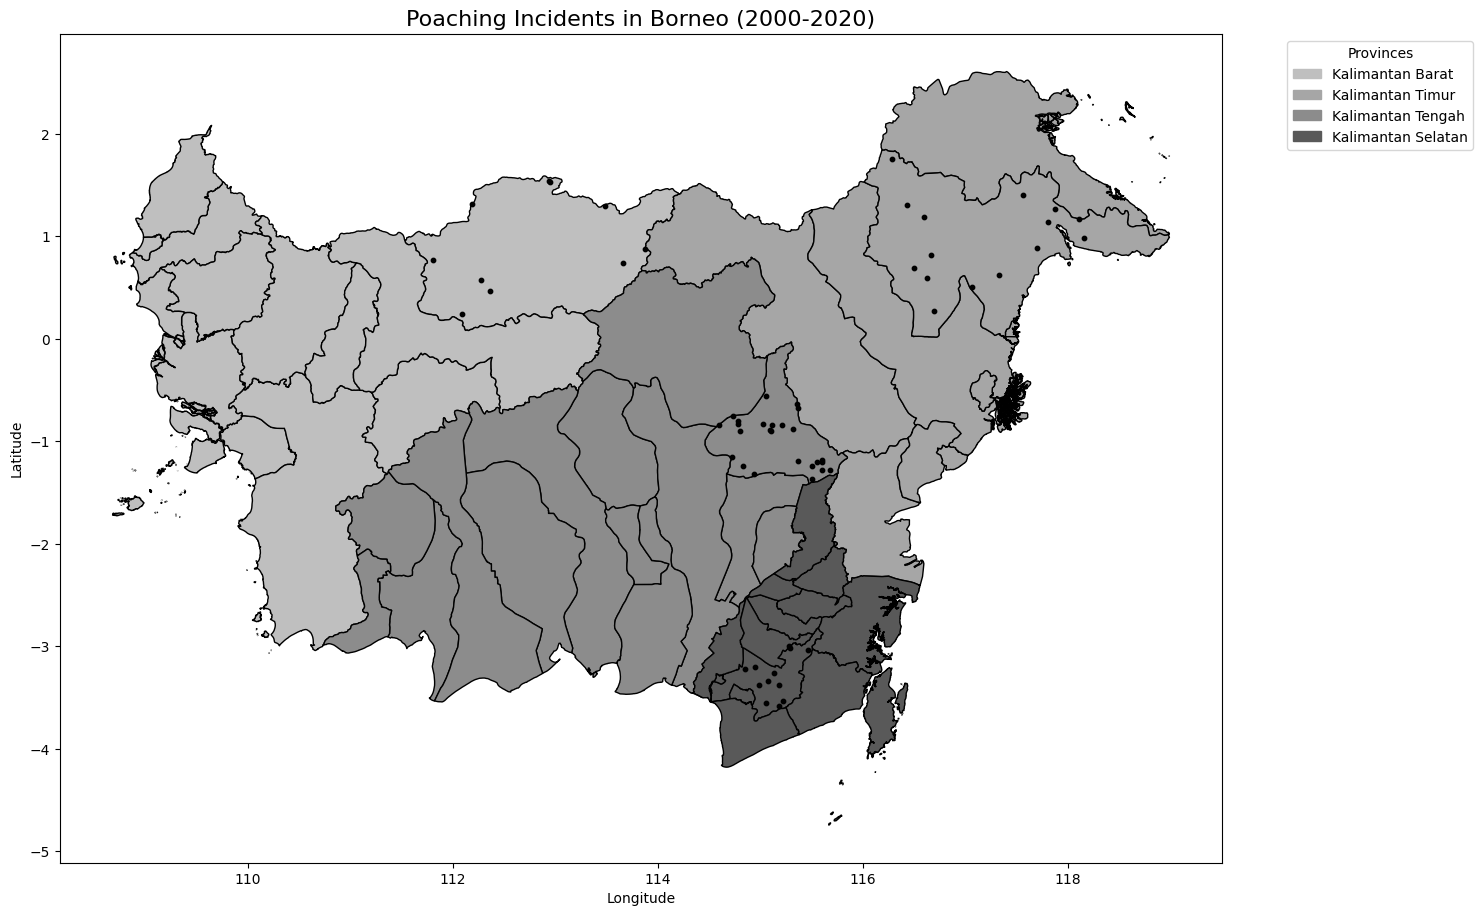

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
import matplotlib.patches as mpatches

# Step 1: Load GADM shapefile for Borneo regions
shapefile_path = '/content/gadm41_IDN_2.shp'
gadm_gdf = gpd.read_file(shapefile_path)

# Clean column names (remove extra whitespace)
gadm_gdf.columns = gadm_gdf.columns.str.strip()

# Normalize the 'NAME_1' and 'NAME_2' columns
gadm_gdf['NAME_1'] = gadm_gdf['NAME_1'].str.strip().str.lower()
gadm_gdf['NAME_2'] = gadm_gdf['NAME_2'].str.strip().str.lower()

# Filter for only the Borneo (Kalimantan) regions
borneo_regions = ['kalimantan barat', 'kalimantan timur', 'kalimantan tengah', 'kalimantan selatan']
gadm_gdf = gadm_gdf[gadm_gdf['NAME_1'].isin(borneo_regions)]

# Step 2: Load PHVA Poaching Data
poaching_data = pd.DataFrame({
    'Province': ['kalimantan barat', 'kalimantan timur', 'kalimantan tengah', 'kalimantan selatan'],
    'Subregion': ['kapuas hulu', 'kutai timur', 'barito utara', 'banjar'],
    'Year': [2020, 2020, 2021, 2022],
    'Incident_Count': [10, 15, 25, 12]
})

# Merge PHVA poaching data with GADM subregions
poaching_data['Subregion'] = poaching_data['Subregion'].str.strip().str.lower()
poaching_gdf = gadm_gdf.merge(poaching_data, left_on='NAME_2', right_on='Subregion', how='inner')

# Generate multiple poaching dots for each subregion
def generate_random_points_in_polygon(polygon, num_points):
    """Generate random points inside a given polygon."""
    minx, miny, maxx, maxy = polygon.bounds
    points = []
    attempts = 0
    while len(points) < num_points and attempts < 1000:  # Limit attempts to avoid infinite loops
        random_point = Point(np.random.uniform(minx, maxx), np.random.uniform(miny, maxy))
        if polygon.contains(random_point):
            points.append(random_point)
        attempts += 1
    return points

# Create poaching dots for every poaching incident
poaching_points = []
for idx, row in poaching_gdf.iterrows():
    if row['Incident_Count'] > 0:
        points = generate_random_points_in_polygon(row['geometry'], row['Incident_Count'])
        poaching_points.extend(points)

# Convert poaching points to GeoDataFrame
poaching_points_gdf = gpd.GeoDataFrame(geometry=poaching_points, crs="EPSG:4326")
if poaching_points_gdf.crs != gadm_gdf.crs:
    poaching_points_gdf = poaching_points_gdf.to_crs(gadm_gdf.crs)

# Step 3: Plot the Map s
fig, ax = plt.subplots(figsize=(15, 15))

province_colors = {
    'kalimantan barat': '#bfbfbf',  # Light Grey
    'kalimantan timur': '#a6a6a6',  # Medium Light Grey
    'kalimantan tengah': '#8c8c8c',  # Medium Grey
    'kalimantan selatan': '#595959'  # Dark Grey
}

patches = []  # For legend
for province, color in province_colors.items():
    province_gdf = gadm_gdf[gadm_gdf['NAME_1'] == province]
    province_gdf.plot(ax=ax, color=color, edgecolor='black')
    # Add province name and color to legend
    patches.append(mpatches.Patch(color=color, label=province.title()))

# Plot the actual poaching points (one dot per incident)
poaching_points_gdf.plot(ax=ax, color='black', markersize=10, label='Poaching Incidents')

# Title and labels
plt.title('Poaching Incidents in Borneo (2000-2020)', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add the legend for provinces
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', title="Provinces")

plt.show()